# Setup

In [32]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle
import sys
from pathlib import Path
import matplotlib.pyplot as plt
# Add the src directory to the path
# sys.path.insert(0, '/Users/yew/code/neon-agbd/src')


# from src.main import compute_site_biomass_full, ALL_SITES

In [10]:
dpids= ['DELA','LENO','TALL','BONA','DEJU','HEAL','SRER','SJER','SOAP',
              'TEAK','CPER','NIWO','RMNP','DSNY','OSBS','JERC','PUUM','KONZ',
              'UKFS','SERC','HARV','UNDE','BART','JORN','DCFS','NOGP','WOOD',
              'GUAN','LAJA','GRSM','ORNL','CLBJ','MOAB','ONAQ','BLAN','MLBS',
              'SCBI','ABBY','WREF','STEI','TREE','YELL']

plot_list = []

for site_id in dpids:
	site_file = f'/Users/yew/code/neon-agbd/output/{site_id}.pkl'
	with open(site_file, 'rb') as f:
		site_dict = pickle.load(f)
		plot_list.append(site_dict['plot_biomass'])

plot_biomass_df = pd.concat(plot_list, ignore_index=True)
plot_biomass_df

,siteID,plotID,year,plotArea_m2,tree_AGBJenkins,tree_AGBChojnacky,tree_AGBAnnighofer,n_trees,small_woody_AGBJenkins,small_woody_AGBChojnacky,small_woody_AGBAnnighofer,n_small_woody_total,n_small_woody_measured,n_unaccounted_trees,total_AGBJenkins,total_AGBChojnacky,total_AGBAnnighofer,growth,growth_cumu
0,DELA,DELA_001,2015,1600.0,45.409061,44.406373,NaN,22,0.612766,0.630304,0.182765,28,18,1,46.021827,45.036676,0.182765,NaN,5.349565
1,DELA,DELA_001,2019,1600.0,66.244231,64.395718,NaN,22,0.949005,0.983348,0.189293,29,18,1,67.193235,65.379065,0.189293,5.292852,5.349565
2,DELA,DELA_001,2022,1600.0,82.694043,80.172850,NaN,23,0.797422,0.823955,0.182765,28,18,1,83.491464,80.996805,0.182765,5.432743,5.349565
3,DELA,DELA_002,2015,1600.0,19.163453,18.812812,NaN,18,1.160753,1.321465,NaN,21,16,1,20.324206,20.134276,0.000000,NaN,1.803042
4,DELA,DELA_002,2019,1600.0,27.295091,26.750160,NaN,18,2.213556,2.477087,NaN,32,18,1,29.508647,29.227247,0.000000,2.296110,1.803042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,YELL,YELL_061,2021,1600.0,57.389788,54.643202,NaN,9,0.126688,0.109647,2.315183,31,13,1,57.516476,54.752848,2.315183,1.631986,7.094329
5681,YELL,YELL_061,2022,1600.0,77.843373,73.977564,NaN,9,0.147617,0.128462,2.256751,28,12,1,77.990990,74.106026,2.256751,20.474514,7.094329
5682,YELL,YELL_061,2023,1600.0,79.844777,75.889784,NaN,9,0.172017,0.150159,2.422369,28,12,1,80.016794,76.039943,2.422369,2.025804,7.094329
5683,YELL,YELL_062,2019,1600.0,14.383323,13.127548,NaN,9,0.799640,0.671110,0.982629,43,15,0,15.182963,13.798658,0.982629,NaN,0.759498


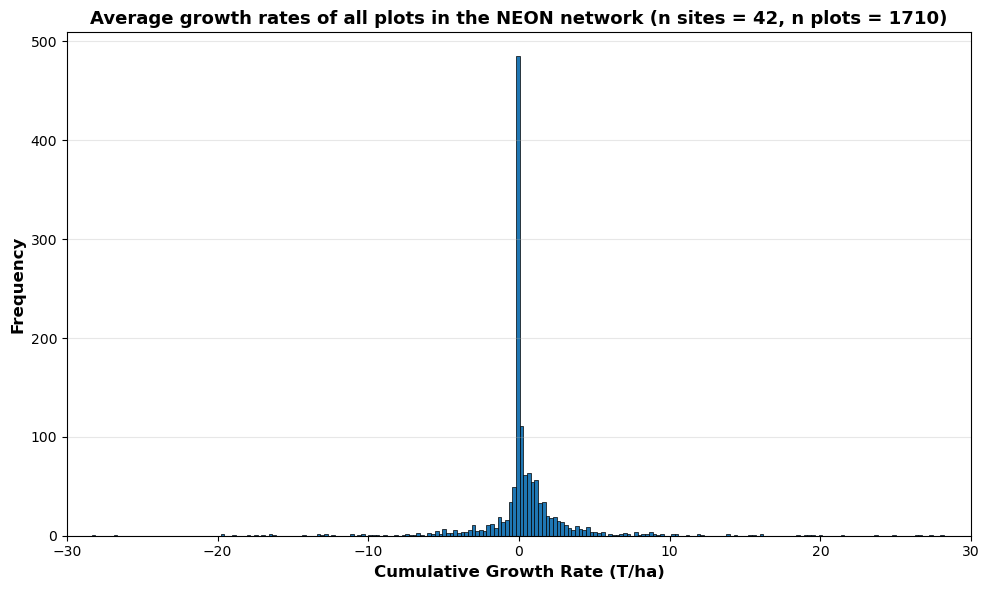


Summary:
  Number of sites: 42
  Number of plots: 1710
  Growth rate range: -177.96 to 66.89 T/ha
  Mean growth rate: 0.30 T/ha
  Median growth rate: 0.00 T/ha


In [20]:
hist_df = plot_biomass_df.drop_duplicates(subset=['plotID']).copy()

# Calculate number of unique sites and plots
n_sites = hist_df['siteID'].nunique()
n_plots = hist_df['plotID'].nunique()

# Create histogram with black edges
plt.figure(figsize=(10, 6))
plt.hist(hist_df['growth_cumu'], bins=1000, edgecolor='black', linewidth=0.5)
plt.xlim(-30, 30)
plt.xlabel('Cumulative Growth Rate (T/ha)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title(f'Average growth rates of all plots in the NEON network (n sites = {n_sites}, n plots = {n_plots})', 
          fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nSummary:")
print(f"  Number of sites: {n_sites}")
print(f"  Number of plots: {n_plots}")
print(f"  Growth rate range: {hist_df['growth_cumu'].min():.2f} to {hist_df['growth_cumu'].max():.2f} T/ha")
print(f"  Mean growth rate: {hist_df['growth_cumu'].mean():.2f} T/ha")
print(f"  Median growth rate: {hist_df['growth_cumu'].median():.2f} T/ha")

In [36]:
site_id = 'ABBY'
site_file = f'/Users/yew/code/neon-agbd/new_notebooks/results/vst/{site_id}.pkl'
with open(site_file, 'rb') as f:
	site_dict = pickle.load(f)

In [37]:
site_dict['plot_jenkins_ts']

,siteID,plotID,plotArea_m2,agb_2015,agb_2016,agb_2017,agb_2018,agb_2019,agb_2020,agb_2021,...,agb_2023,change_2015,change_2016,change_2017,change_2018,change_2019,change_2020,change_2021,change_2022,change_2023
0,ABBY,ABBY_001,1600.0,NaN,115.709160,116.868842,118.028523,119.188205,NaN,NaN,...,NaN,NaN,NaN,1.159682,1.159682,1.159682,NaN,NaN,NaN,NaN
1,ABBY,ABBY_002,1600.0,NaN,0.279506,0.752504,1.225502,1.698501,NaN,NaN,...,NaN,NaN,NaN,0.472998,0.472998,0.472998,NaN,NaN,NaN,NaN
2,ABBY,ABBY_003,1600.0,NaN,7.075896,9.541158,12.006421,14.471683,NaN,NaN,...,NaN,NaN,NaN,2.465262,2.465262,2.465262,NaN,NaN,NaN,NaN
3,ABBY,ABBY_004,1600.0,NaN,0.936401,1.214576,1.492752,1.770928,NaN,NaN,...,NaN,NaN,NaN,0.278176,0.278176,0.278176,NaN,NaN,NaN,NaN
4,ABBY,ABBY_005,400.0,NaN,6.721233,7.897207,9.073181,10.249154,NaN,NaN,...,NaN,NaN,NaN,1.175974,1.175974,1.175974,NaN,NaN,NaN,NaN
5,ABBY,ABBY_006,1600.0,NaN,155.191997,165.413513,175.635029,185.856545,NaN,NaN,...,NaN,NaN,NaN,10.221516,10.221516,10.221516,NaN,NaN,NaN,NaN
6,ABBY,ABBY_007,1600.0,NaN,0.977586,0.771807,0.566028,0.360250,NaN,NaN,...,NaN,NaN,NaN,-0.205779,-0.205779,-0.205779,NaN,NaN,NaN,NaN
7,ABBY,ABBY_008,1600.0,NaN,156.487498,146.669902,136.852305,127.034708,NaN,NaN,...,NaN,NaN,NaN,-9.817597,-9.817597,-9.817597,NaN,NaN,NaN,NaN
8,ABBY,ABBY_009,1600.0,NaN,1.226255,1.478144,1.730033,1.981922,NaN,NaN,...,NaN,NaN,NaN,0.251889,0.251889,0.251889,NaN,NaN,NaN,NaN
9,ABBY,ABBY_010,1600.0,NaN,102.149900,101.328613,100.507327,99.686040,NaN,NaN,...,NaN,NaN,NaN,-0.821287,-0.821287,-0.821287,NaN,NaN,NaN,NaN


In [25]:
site_dict['individual_trees']

,siteID,plotID,individualID,year,AGBJenkins,AGBChojnacky,AGBAnnighofer,growth_AGBJenkins,growth_cumu_AGBJenkins,growth_AGBChojnacky,...,corrected_is_dead,gapFilling,scientificName,taxonID,genus,family,taxonRank,pointID,stemDistance,stemAzimuth
0,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00001,2021,21.958470,19.068443,0.0,NaN,NaN,NaN,...,False,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,21,4.6,77.1
1,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00005,2021,56.659165,50.004457,0.0,NaN,NaN,NaN,...,False,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,21,2.9,31.1
2,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2016,0.000000,0.000000,0.0,NaN,1723.845551,NaN,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
3,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2017,0.000000,0.000000,0.0,0.0,1723.845551,0.0,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
4,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2018,0.000000,0.000000,0.0,0.0,1723.845551,0.0,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,ABBY,ABBY_023,NEON.PLA.D16.ABBY.09945,2019,29.413027,0.000000,0.0,0.0,0.000000,0.0,...,False,ORIGINAL,Prunus emarginata (Douglas ex Hook.) D. Dietr.,PREM,Prunus,Rosaceae,species,51,4.6,230.4
4254,ABBY,ABBY_023,NEON.PLA.D16.ABBY.09946,2016,16.531197,15.376333,0.0,NaN,0.000000,NaN,...,False,FILLED,Prunus emarginata (Douglas ex Hook.) D. Dietr.,PREM,Prunus,Rosaceae,species,51,10.1,209.6
4255,ABBY,ABBY_023,NEON.PLA.D16.ABBY.09946,2019,16.531197,15.376333,0.0,0.0,0.000000,0.0,...,False,ORIGINAL,Prunus emarginata (Douglas ex Hook.) D. Dietr.,PREM,Prunus,Rosaceae,species,51,10.1,209.6
4256,ABBY,ABBY_023,NEON.PLA.D16.ABBY.09947,2016,14.109269,12.995139,0.0,NaN,0.000000,NaN,...,False,FILLED,Prunus emarginata (Douglas ex Hook.) D. Dietr.,PREM,Prunus,Rosaceae,species,51,9.0,213.2


In [24]:
site_dict['vst_mappingandtagging']

,uid,namedLocation,date,eventID,domainID,siteID,plotID,pointID,stemDistance,stemAzimuth,...,identificationReferences,morphospeciesID,morphospeciesIDRemarks,identificationQualifier,remarks,measuredBy,recordedBy,dataQF,publicationDate,release
0,2b0944f9-99c6-4cdf-920d-fe2696b5a07f,ABBY_063.basePlot.vst,2015-07-23,vst_ABBY_2015,D16,ABBY,ABBY_063,57,7.4,94.8,...,,,,,,krian@neoninc.org,kzias@field-ops.org,,20250122T230135Z,RELEASE-2025
1,a67afcd3-69aa-4e1b-bc4d-aa998ad12058,ABBY_063.basePlot.vst,2015-07-23,vst_ABBY_2015,D16,ABBY,ABBY_063,39,16.9,75.2,...,,,,,,krian@neoninc.org,kzias@field-ops.org,,20250122T230135Z,RELEASE-2025
2,56c4b5d8-85a2-4a5d-aaf2-de492030f1b7,ABBY_063.basePlot.vst,2015-07-23,vst_ABBY_2015,D16,ABBY,ABBY_063,,NaN,NaN,...,,,,,On subplot line; retained in dataset.,krian@neoninc.org,kzias@field-ops.org,,20250122T230135Z,RELEASE-2025
3,d277c3cc-49f4-4c28-b47a-de24109aa493,ABBY_063.basePlot.vst,2015-07-23,vst_ABBY_2015,D16,ABBY,ABBY_063,,NaN,NaN,...,,,,,no transcription errors found,krian@neoninc.org,kzias@field-ops.org,,20250122T230135Z,RELEASE-2025
4,cf715a4b-b588-47c2-add8-72a7f0a3a0d9,ABBY_063.basePlot.vst,2015-07-23,vst_ABBY_2015,D16,ABBY,ABBY_063,57,9.7,111.9,...,,,,,,krian@neoninc.org,kzias@field-ops.org,,20250122T230135Z,RELEASE-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,e917b357-0a4c-4ada-9ecd-54492636803c,ABBY_017.basePlot.vst,2024-12-03,vst_ABBY_2024,D16,ABBY,ABBY_017,,NaN,NaN,...,,,,,,0009-0005-4412-7737,0000-0003-2086-5426,,20250122T230135Z,RELEASE-2025
4325,0df7a57a-30fd-4810-b52a-9442dea6b0fc,ABBY_017.basePlot.vst,2024-12-03,vst_ABBY_2024,D16,ABBY,ABBY_017,,NaN,NaN,...,,,,,,0000-0003-2086-5426,0009-0005-4412-7737,,20250122T230135Z,RELEASE-2025
4326,790176b6-50dc-461e-a7a7-26e5d4287cf0,ABBY_017.basePlot.vst,2024-12-03,vst_ABBY_2024,D16,ABBY,ABBY_017,,NaN,NaN,...,,,,,,0009-0005-4412-7737,0000-0003-2086-5426,,20250122T230135Z,RELEASE-2025
4327,cc907199-4191-4257-9bd9-7cf0a15b4700,ABBY_017.basePlot.vst,2024-12-03,vst_ABBY_2024,D16,ABBY,ABBY_017,,NaN,NaN,...,,,,,,0000-0003-2086-5426,0009-0005-4412-7737,,20250122T230135Z,RELEASE-2025


## Interactive version with Plotly (hover to see plotID)

In [41]:
import plotly.express as px

def plot_site_biomass(site_id, site_file):
    """
    Create an interactive plot of above-ground biomass over time for a NEON site.
    
    Parameters
    ----------
    site_id : str
        Four-character NEON site code (e.g., 'ABBY', 'DELA')
    site_file : str
        Path to the pickle file containing site data
    """
    # Load the site data
    with open(site_file, 'rb') as f:
        site_dict = pickle.load(f)
    
    # Get plot biomass data
    o_plots = site_dict['plot_biomass'].copy()
    
    # Rename column for easier access in hover_data
    o_plots['growth_rate'] = o_plots['growth_t-1_to_t']
    
    # Calculate number of unique plots
    n_plots = o_plots['plotID'].nunique()
    
    # Create interactive plot with Plotly
    fig = px.line(o_plots, 
                  x='year', 
                  y='total_AGBJenkins',
                  color='plotID',
                  markers=True,
                  labels={'total_AGBJenkins': 'AGB Jenkins (T/ha)',
                          'year': 'Year',
                          'plotID': 'Plot ID',
                          'growth_rate': 'Growth Rate (T/ha)'},
                  title=f'Above-Ground Biomass Over Time - Site {site_id} (n plots = {n_plots})',
                  hover_data={
                      'plotID': True, 
                      'year': True, 
                      'total_AGBJenkins': ':.2f',
                      'n_trees': True,
                      'n_unaccounted_trees': True,
                      'growth_rate': ':.2f',
                      'n_small_woody_measured': True,
                      'n_small_woody_total': True
                  })
    
    # Customize layout
    fig.update_traces(marker=dict(size=8), line=dict(width=2))
    fig.update_layout(
        height=700,
        width=1000,
        hovermode='closest',
        legend=dict(
            orientation="h",
            yanchor="top",
            y=-0.15,
            xanchor="center",
            x=0.5,
            title="Plot ID"
        ),
        xaxis=dict(title_font=dict(size=14, family='Arial, bold')),
        yaxis=dict(title_font=dict(size=14, family='Arial, bold')),
        title_font=dict(size=16, family='Arial, bold'),
        margin=dict(b=150)  # Add bottom margin for legend
    )
    
    fig.show()
    
    print(f"\nInteractive plot created for site {site_id}!")
    print(f"  Number of plots: {n_plots}")
    print(f"  Year range: {o_plots['year'].min()} - {o_plots['year'].max()}")
    print(f"\nHover over points to see details.")
    print(f"You can also: zoom, pan, select regions, and toggle plot visibility by clicking legend items.")
    
    return fig


# Example usage:
site_id = 'ABBY'
site_file = f'/Users/yew/code/neon-agbd/new_notebooks/results/vst/{site_id}.pkl'
plot_site_biomass(site_id, site_file)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/yew/code/neon-agbd/new_notebooks/results/vst/ABBY.pkl'

In [26]:
trees = site_dict["individual_trees"]
trees[trees['individualID'] == 'NEON.PLA.D16.ABBY.00012']

,siteID,plotID,individualID,year,AGBJenkins,AGBChojnacky,AGBAnnighofer,growth_AGBJenkins,growth_cumu_AGBJenkins,growth_AGBChojnacky,...,corrected_is_dead,gapFilling,scientificName,taxonID,genus,family,taxonRank,pointID,stemDistance,stemAzimuth
2,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2016,0.000000,0.000000,0.0,NaN,1723.845551,NaN,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
3,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2017,0.000000,0.000000,0.0,0.000000,1723.845551,0.000000,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
4,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2018,0.000000,0.000000,0.0,0.000000,1723.845551,0.000000,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
5,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2019,31891.142688,31358.258255,0.0,31891.142688,1723.845551,31358.258255,...,False,FILLED,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
6,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2021,0.000000,0.000000,0.0,-15945.571344,1723.845551,-15679.129127,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
